In [1]:
from mdrfep_utils.mdr_analysis_utils import *

# This notebook is for creating heatmaps to visualize MDR-FEP ∆∆G values

---

### <font color='red'> Choose protein, minimization, and score function </font>

In [2]:
protein = list(protein_dict.keys())[0]
minimized = True
hardrep = True

In [3]:
print(f'We are analyzing results for {protein_dict.get(protein)}, Minimized? {minimized}, hardrep? {hardrep}')

We are analyzing results for IL-7ra, Minimized? True, hardrep? True


In [4]:
if minimized:
    
    if hardrep:
        results_dir = f'/Users/owenrogers/PycharmProjects/MDRFEP/data/results/per_protein/{protein}__hardrep__min__5'
        file_name = f'{protein}_hardrep_min_heatmap'
        run_name = 'hardrep__min__5'
    else:
        results_dir = f'/Users/owenrogers/PycharmProjects/MDRFEP/data/results/per_protein/{protein}__softrep__min__5'
        file_name = f'{protein}_softrep_min_heatmap'
        run_name = 'softrep__min__5'
    
else:
    
    if hardrep:
        results_dir = f'/Users/owenrogers/PycharmProjects/MDRFEP/data/results/per_protein/{protein}__hardrep__nomin__5'  
        file_name = f'{protein}_hardrep_nomin_heatmap'
        run_name = 'hardrep__nomin__5'
    else:
        results_dir = f'/Users/owenrogers/PycharmProjects/MDRFEP/data/results/per_protein/{protein}__softrep__nomin__5'
        file_name = f'{protein}_softrep_nomin_heatmap'
        run_name = 'softrep__nomin__5'
        
# and then it's all {protein}_dimer or {protein}_monomer for the .npz files

In [5]:
print(f'The results are in this directory: {results_dir}')

The results are in this directory: /Users/owenrogers/PycharmProjects/MDRFEP/data/results/per_protein/bcov_v3_r3_ems_3hC_436_0002_000000017_0001_0001_47_64_H_.._ems_p1-15H-GBL-16H-GABBL-16H_0382_0001_0001_0001_0001_0001_0001_0001_0001__hardrep__min__5


In [6]:
print(f'The file will be saved as {file_name}, and the run name is {run_name}')

The file will be saved as bcov_v3_r3_ems_3hC_436_0002_000000017_0001_0001_47_64_H_.._ems_p1-15H-GBL-16H-GABBL-16H_0382_0001_0001_0001_0001_0001_0001_0001_0001_hardrep_min_heatmap, and the run name is hardrep__min__5


### <font color='red'> Get the chain A sequence from both PDBs </span>

In [7]:
protein_pdb = f'/Users/owenrogers/PycharmProjects/MDRFEP/data/natives/{protein}.pdb'

monomer_seq = get_sequence(protein_pdb)
dimer_seq = get_sequence(protein_pdb)

assert monomer_seq == dimer_seq   

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.39+release.59628fbc5bc09f1221e1642f1f8d157ce49b1410 2024-09-23T07:49:48] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.m1.cxx11thread.serialization.pyth

In [8]:
dimer_npz = f'{results_dir}/{protein}__{run_name}__dimer.npz'
monomer_npz = f'{results_dir}/{protein}__{run_name}__monomer.npz'

### <font color='red'> Set the beta parameter (should be determined using a grid search but could be guessed here) </font>

In [9]:
beta = 0.001

### <font color='red'> Create an empty heatmap, and then fill and plot it </font>

In [10]:
heatmap, label, ddg_data = fill_heatmap(monomer_seq, dimer_seq, dimer_npz, monomer_npz, beta=beta)

SVKKKVRKVEKKARKAGDELAVLLARRVLEALEKGLVSEEDADESADRIEEALKK


In [11]:
title = f'{protein_dict.get(protein)} for {naming_dict.get(run_name)}'

In [12]:
print(title)

IL-7ra for Hardrep w/ minimization


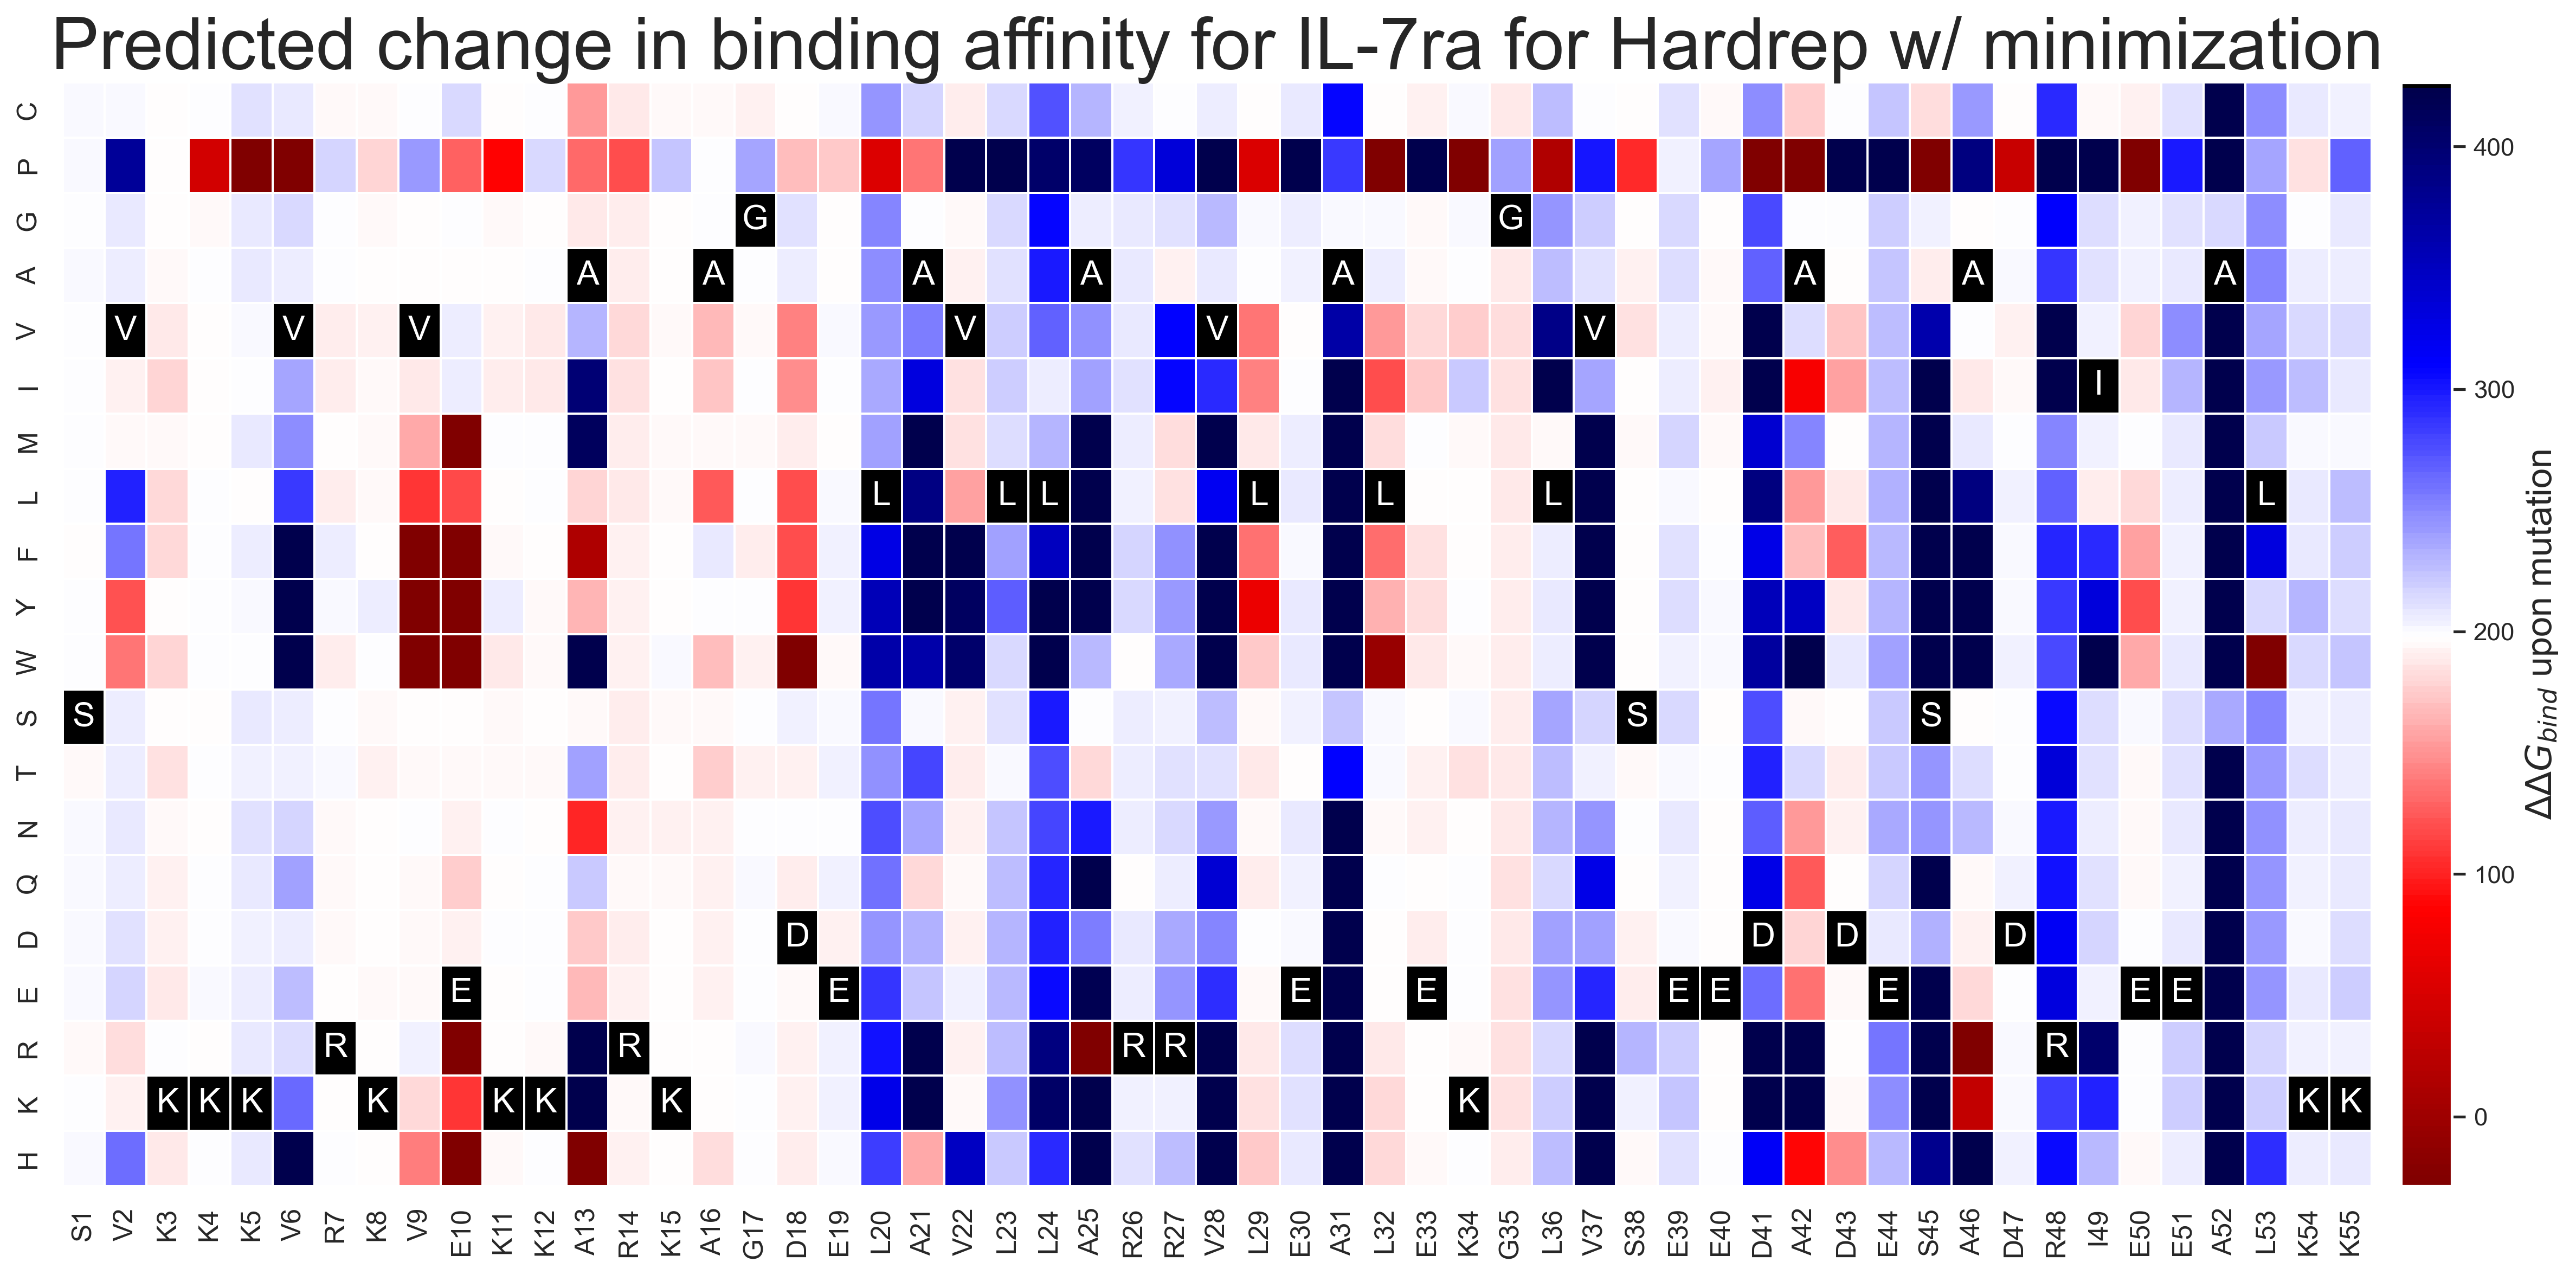

In [13]:
plot_heatmap(heatmap, title, label, ddg_data, save_name=f'{protein_dict.get(protein)}_{run_name}_beta{beta}')